In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from math import sin, cos, pi
import cv2, os
from tqdm.auto import tqdm
import random

import tensorflow
from tensorflow import keras 
# from keras.models import Sequential, Model, load_model

ModuleNotFoundError: No module named 'mobilenet_v1'

In [190]:
ffhq_model = 'ffhq-dataset-v2.json'

train_data = pd.read_json(ffhq_model, orient='column')

In [ ]:
index = random.randrange(70000)
image = train_data[index]['image']['file_path']
keypoints = train_data[index]['image']['face_landmarks']
mouth_keypoints = keypoints[48::]
print(image, train_data[index])

In [ ]:
def plot_sample(image, keypoint, axis, title):
    img = cv2.imread(image)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axis.imshow(RGB_img)
    keypoint = np.array(keypoint).flatten()
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)

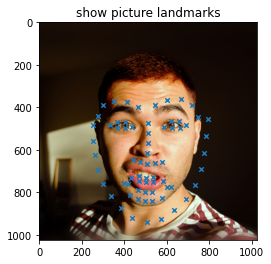

In [ ]:
fig, axis = plt.subplots()
plot_sample(image, keypoints, axis, 'show picture landmarks')

In [ ]:
def findPointsBounds(points, offset):
    """returns a list containing the bottom left and the top right 
    points in the sequence
    Here, we use min and max four times over the collection of points
    """
    bot_left_x = min(point[0] for point in points)
    bot_left_y = min(point[1] for point in points)
    top_right_x = max(point[0] for point in points)
    top_right_y = max(point[1] for point in points)

    return [[int(bot_left_x - offset), int(bot_left_y - offset)], [int(top_right_x + offset), int(top_right_y + offset)]]
    

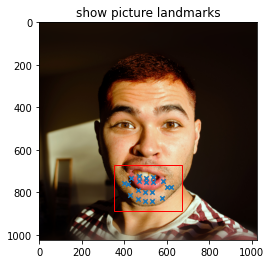

In [ ]:
fig, axis = plt.subplots()
plot_sample(image, mouth_keypoints, axis, 'show picture landmarks')
[a, b] = findPointsBounds(mouth_keypoints, 50)
axis.add_patch(patches.Rectangle((a), b[0] - a[0], b[1] - a[1], linewidth=1, edgecolor='r', facecolor='none'))

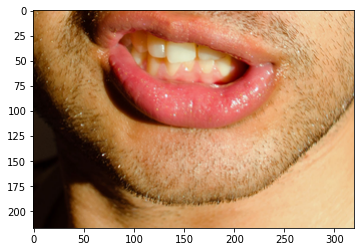

In [ ]:
fig, axis = plt.subplots()
img = cv2.imread(image)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
crop_img = RGB_img[int(a[1]):int(b[1]), int(a[0]):int(b[0])]
axis.imshow(crop_img)

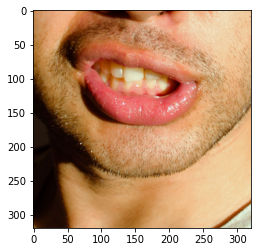

In [ ]:
fig, axis = plt.subplots()
img = cv2.imread(image)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

middleX = (b[0] - a[0]) / 2 + a[0]
middleY = (b[1] - a[1]) / 2 + a[1]

resHalf = max(b[1] - a[1], b[0] - a[0]) / 2

cornerA = [
    middleX - resHalf,
    middleY - resHalf
]

cornerB = [
    middleX + resHalf,
    middleY + resHalf
]

crop_img = RGB_img[int(cornerA[1]):int(cornerB[1]), int(cornerA[0]):int(cornerB[0])]
axis.imshow(crop_img)

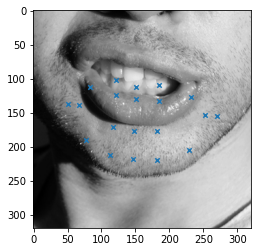

In [ ]:
fig, axis = plt.subplots()
graysacale = cv2.cvtColor(crop_img, cv2.COLOR_RGB2GRAY)
axis.imshow(graysacale, cmap="gray")
offseted_keypoints = []
for point in mouth_keypoints:
    offseted_keypoints.append([point[0] - cornerA[0], point[1] - cornerA[1]])
offseted_keypoints = np.array(offseted_keypoints).flatten()

axis.scatter(offseted_keypoints[0::2], offseted_keypoints[1::2], marker='x', s=20)